#                         Breast Cancer Diagnosis - (ML Algorithms)

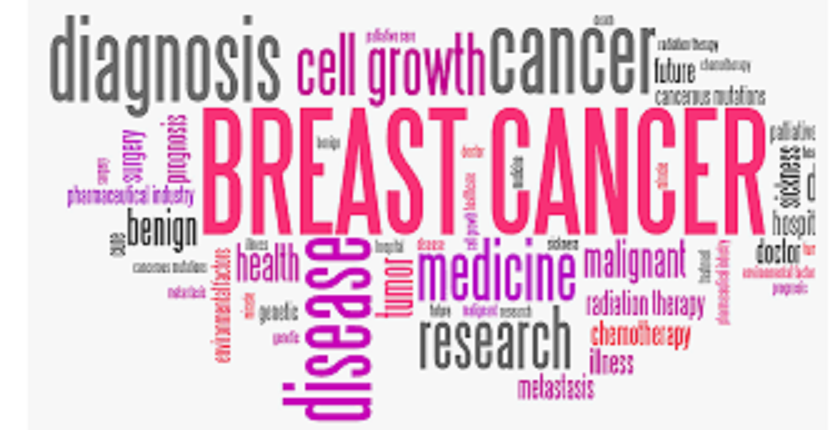










# **Description:**

- Breast Cancer is the most common cancer amongest the women in world.
- Its about **30% of all cancer cases.**
- In 2020, there were **2.3 Million women diagnosed with breast cancer and 685000 deaths globally.As of the end of 2020,   there were 7.8 Million women alive** who were daignosed with cancer in past 5 Years, making it the world most prevalent cancer.
- It starts when cells in the breast begin to grow out of control.
- These cells usually form tumors that can be seen via X-ray or felt as lumps in the breast area.
- The key challenges against it’s detection is how to classify tumors into **malignant (cancerous) or benign(non cancerous)**.
- We ask you to complete the analysis of classifying these tumors using **machine learning algorithms and the Breast Cancer Wisconsin (Diagnostic) Dataset.**

# **Acknowledgements:**

- This dataset has been taken from Kaggle.

# **Objectives:**

**The objectives of this data mining are:**
- Understand the Dataset
- Cleanup the Dataset
- Knowing the best machine learning algorithms for breast cancer diagnosis classification.
- Build classification models to predict whether the cancer type is **Malignant or Benign**.
- Also fine-tune the hyperparameters & compare the evaluation metrics of various classification algorithms.

# What is Breast Cancer?

Breast cancer is a disease in which cells in the breast grow out of control. There are different kinds of breast cancer. The kind of breast cancer depends on which cells in the breast turn into cancer.
Breast cancer can begin in different parts of the breast. A breast is made up of three main parts: lobules, ducts, and connective tissue. The lobules are the glands that produce milk. The ducts are tubes that carry milk to the nipple. The connective tissue (which consists of fibrous and fatty tissue) surrounds and holds everything together. Most breast cancers begin in the ducts or lobules.
Breast cancer can spread outside the breast through blood vessels and lymph vessels. When breast cancer spreads to other parts of the body, it is said to have metastasized.

- **Types**
- Invasive ductal carcinoma.
- Invasive lobular carcinoma

# **Content**

**We have to solve the problem statement by creating a plan of action, Here are some of the necessary steps:**

1. Data Exploration
2. Exploratory Data Analysis (EDA)


# Data Exploration

# **Import libraries**

In [9]:
import math
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pylab as plt
CMAP= 'Oranges'

import warnings
warnings.filterwarnings("ignore")

# **Load Dataset**

In [10]:
df= pd.read_csv("breast-cancer.csv")

In [11]:
df.head().style.background_gradient(cmap = CMAP)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.990000,10.380000,122.800000,1001.000000,0.118400,0.277600,0.300100,0.147100,0.241900,0.078710,1.095000,0.905300,8.589000,153.400000,0.006399,0.049040,0.053730,0.015870,0.030030,0.006193,25.380000,17.330000,184.600000,2019.000000,0.162200,0.665600,0.711900,0.265400,0.460100,0.118900
1,842517,M,20.570000,17.770000,132.900000,1326.000000,0.084740,0.078640,0.086900,0.070170,0.181200,0.056670,0.543500,0.733900,3.398000,74.080000,0.005225,0.013080,0.018600,0.013400,0.013890,0.003532,24.990000,23.410000,158.800000,1956.000000,0.123800,0.186600,0.241600,0.186000,0.275000,0.089020
2,84300903,M,19.690000,21.250000,130.000000,1203.000000,0.109600,0.159900,0.197400,0.127900,0.206900,0.059990,0.745600,0.786900,4.585000,94.030000,0.006150,0.040060,0.038320,0.020580,0.022500,0.004571,23.570000,25.530000,152.500000,1709.000000,0.144400,0.424500,0.450400,0.243000,0.361300,0.087580
3,84348301,M,11.420000,20.380000,77.580000,386.100000,0.142500,0.283900,0.241400,0.105200,0.259700,0.097440,0.495600,1.156000,3.445000,27.230000,0.009110,0.074580,0.056610,0.018670,0.059630,0.009208,14.910000,26.500000,98.870000,567.700000,0.209800,0.866300,0.686900,0.257500,0.663800,0.173000
4,84358402,M,20.290000,14.340000,135.100000,1297.000000,0.100300,0.132800,0.198000,0.104300,0.180900,0.058830,0.757200,0.781300,5.438000,94.440000,0.011490,0.024610,0.056880,0.018850,0.017560,0.005115,22.540000,16.670000,152.200000,1575.000000,0.137400,0.205000,0.400000,0.162500,0.236400,0.076780


In [12]:
target = 'diagnosis'
labels = ['Benign','Malignant']
features = [i for i in df.columns.values if i not in [target]]

display(df.tail().style.background_gradient(cmap = CMAP))

print('Result:The Datset consists of {} features & {} samples.'.format(df.shape[1], df.shape[0]))

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
564,926424,M,21.560000,22.390000,142.000000,1479.000000,0.111000,0.115900,0.243900,0.138900,0.172600,0.056230,1.176000,1.256000,7.673000,158.700000,0.010300,0.028910,0.051980,0.024540,0.011140,0.004239,25.450000,26.400000,166.100000,2027.000000,0.141000,0.211300,0.410700,0.221600,0.206000,0.071150
565,926682,M,20.130000,28.250000,131.200000,1261.000000,0.097800,0.103400,0.144000,0.097910,0.175200,0.055330,0.765500,2.463000,5.203000,99.040000,0.005769,0.024230,0.039500,0.016780,0.018980,0.002498,23.690000,38.250000,155.000000,1731.000000,0.116600,0.192200,0.321500,0.162800,0.257200,0.066370
566,926954,M,16.600000,28.080000,108.300000,858.100000,0.084550,0.102300,0.092510,0.053020,0.159000,0.056480,0.456400,1.075000,3.425000,48.550000,0.005903,0.037310,0.047300,0.015570,0.013180,0.003892,18.980000,34.120000,126.700000,1124.000000,0.113900,0.309400,0.340300,0.141800,0.221800,0.078200
567,927241,M,20.600000,29.330000,140.100000,1265.000000,0.117800,0.277000,0.351400,0.152000,0.239700,0.070160,0.726000,1.595000,5.772000,86.220000,0.006522,0.061580,0.071170,0.016640,0.023240,0.006185,25.740000,39.420000,184.600000,1821.000000,0.165000,0.868100,0.938700,0.265000,0.408700,0.124000
568,92751,B,7.760000,24.540000,47.920000,181.000000,0.052630,0.043620,0.000000,0.000000,0.158700,0.058840,0.385700,1.428000,2.548000,19.150000,0.007189,0.004660,0.000000,0.000000,0.026760,0.002783,9.456000,30.370000,59.160000,268.600000,0.089960,0.064440,0.000000,0.000000,0.287100,0.070390


Result:The Datset consists of 32 features & 569 samples.


# **Check DataType**

In [5]:
#Checking the dtypes of all the columns

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

# **Check Shape**

In [6]:
df.shape

(569, 32)

**Observation:**
- no. of rows = 569
- no. of columns = 32

# **Check Size**

In [7]:
df.size

18208

In [8]:
df['diagnosis']=df['diagnosis'].apply(lambda x : 1 if x=='M' else 0)

In [97]:
pd.DataFrame(df.value_counts())

,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,0
id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,
911320502,0,13.170,18.22,84.28,537.3,0.07466,0.05994,0.04859,0.02870,0.1454,0.05549,0.2023,0.6850,1.236,16.89,0.005969,0.01493,0.01564,0.008463,0.01093,0.001672,14.90,23.89,95.10,687.6,0.1282,0.1965,0.18760,0.10450,0.2235,0.06925,1
883270,0,14.220,27.85,92.55,623.9,0.08223,0.10390,0.11030,0.04408,0.1342,0.06129,0.3354,2.3240,2.105,29.96,0.006307,0.02845,0.03850,0.010110,0.01185,0.003589,15.75,40.54,102.50,764.0,0.1081,0.2426,0.30640,0.08219,0.1890,0.07796,1
884626,0,12.890,14.11,84.95,512.2,0.08760,0.13460,0.13740,0.03980,0.1596,0.06409,0.2025,0.4402,2.393,16.35,0.005501,0.05592,0.08158,0.013700,0.01266,0.007555,14.39,17.70,105.00,639.1,0.1254,0.5849,0.77270,0.15610,0.2639,0.11780,1
884448,0,13.200,17.43,84.13,541.6,0.07215,0.04524,0.04336,0.01105,0.1487,0.05635,0.1630,1.6010,0.873,13.56,0.006261,0.01569,0.03079,0.005383,0.01962,0.002250,13.94,27.82,88.28,602.0,0.1101,0.1508,0.22980,0.04970,0.2767,0.07198,1
884437,0,10.480,19.86,66.72,337.7,0.10700,0.05971,0.04831,0.03070,0.1737,0.06440,0.3719,2.6120,2.517,23.22,0.016040,0.01386,0.01865,0.011330,0.03476,0.003560,11.48,29.46,73.68,402.8,0.1515,0.1026,0.11810,0.06736,0.2883,0.07748,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
927241,1,20.600,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,0.7260,1.5950,5.772,86.22,0.006522,0.06158,0.07117,0.016640,0.02324,0.006185,25.74,39.42,184.60,1821.0,0.1650,0.8681,0.93870,0.26500,0.4087,0.12400,1
8510426,0,13.540,14.36,87.46,566.3,0.09779,0.08129,0.06664,0.04781,0.1885,0.05766,0.2699,0.7886,2.058,23.56,0.008462,0.01460,0.02387,0.013150,0.01980,0.002300,15.11,19.26,99.70,711.2,0.1440,0.1773,0.23900,0.12880,0.2977,0.07259,1
8510653,0,13.080,15.71,85.63,520.0,0.10750,0.12700,0.04568,0.03110,0.1967,0.06811,0.1852,0.7477,1.383,14.67,0.004097,0.01898,0.01698,0.006490,0.01678,0.002425,14.50,20.49,96.09,630.5,0.1312,0.2776,0.18900,0.07283,0.3184,0.08183,1


# Get Statistical Information about all features

In [10]:
df.describe().T.style.background_gradient(cmap = CMAP)

,count,mean,std,min,25%,50%,75%,max
id,569.000000,30371831.432337,125020585.612224,8670.000000,869218.000000,906024.000000,8813129.000000,911320502.000000
diagnosis,569.000000,0.372583,0.483918,0.000000,0.000000,0.000000,1.000000,1.000000
radius_mean,569.000000,14.127292,3.524049,6.981000,11.700000,13.370000,15.780000,28.110000
texture_mean,569.000000,19.289649,4.301036,9.710000,16.170000,18.840000,21.800000,39.280000
perimeter_mean,569.000000,91.969033,24.298981,43.790000,75.170000,86.240000,104.100000,188.500000
area_mean,569.000000,654.889104,351.914129,143.500000,420.300000,551.100000,782.700000,2501.000000
smoothness_mean,569.000000,0.096360,0.014064,0.052630,0.086370,0.095870,0.105300,0.163400
compactness_mean,569.000000,0.104341,0.052813,0.019380,0.064920,0.092630,0.130400,0.345400
concavity_mean,569.000000,0.088799,0.079720,0.000000,0.029560,0.061540,0.130700,0.426800
concave points_mean,569.000000,0.048919,0.038803,0.000000,0.020310,0.033500,0.074000,0.201200


# **Correlation between column**

In [11]:
df.corr().style.background_gradient(cmap = CMAP)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
id,1.000000,0.039769,0.074626,0.099770,0.073159,0.096893,-0.012968,0.000096,0.050080,0.044158,-0.022114,-0.052511,0.143048,-0.007526,0.137331,0.177742,0.096781,0.033961,0.055239,0.078768,-0.017306,0.025725,0.082405,0.064720,0.079986,0.107187,0.010338,-0.002968,0.023203,0.035174,-0.044224,-0.029866
diagnosis,0.039769,1.000000,0.730029,0.415185,0.742636,0.708984,0.358560,0.596534,0.696360,0.776614,0.330499,-0.012838,0.567134,-0.008303,0.556141,0.548236,-0.067016,0.292999,0.253730,0.408042,-0.006522,0.077972,0.776454,0.456903,0.782914,0.733825,0.421465,0.590998,0.659610,0.793566,0.416294,0.323872
radius_mean,0.074626,0.730029,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,-0.311631,0.679090,-0.097317,0.674172,0.735864,-0.222600,0.206000,0.194204,0.376169,-0.104321,-0.042641,0.969539,0.297008,0.965137,0.941082,0.119616,0.413463,0.526911,0.744214,0.163953,0.007066
texture_mean,0.099770,0.415185,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,0.071401,-0.076437,0.275869,0.386358,0.281673,0.259845,0.006614,0.191975,0.143293,0.163851,0.009127,0.054458,0.352573,0.912045,0.358040,0.343546,0.077503,0.277830,0.301025,0.295316,0.105008,0.119205
perimeter_mean,0.073159,0.742636,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,-0.261477,0.691765,-0.086761,0.693135,0.744983,-0.202694,0.250744,0.228082,0.407217,-0.081629,-0.005523,0.969476,0.303038,0.970387,0.941550,0.150549,0.455774,0.563879,0.771241,0.189115,0.051019
area_mean,0.096893,0.708984,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,0.151293,-0.283110,0.732562,-0.066280,0.726628,0.800086,-0.166777,0.212583,0.207660,0.372320,-0.072497,-0.019887,0.962746,0.287489,0.959120,0.959213,0.123523,0.390410,0.512606,0.722017,0.143570,0.003738
smoothness_mean,-0.012968,0.358560,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,0.557775,0.584792,0.301467,0.068406,0.296092,0.246552,0.332375,0.318943,0.248396,0.380676,0.200774,0.283607,0.213120,0.036072,0.238853,0.206718,0.805324,0.472468,0.434926,0.503053,0.394309,0.499316
compactness_mean,0.000096,0.596534,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,0.602641,0.565369,0.497473,0.046205,0.548905,0.455653,0.135299,0.738722,0.570517,0.642262,0.229977,0.507318,0.535315,0.248133,0.590210,0.509604,0.565541,0.865809,0.816275,0.815573,0.510223,0.687382
concavity_mean,0.050080,0.696360,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,0.500667,0.336783,0.631925,0.076218,0.660391,0.617427,0.098564,0.670279,0.691270,0.683260,0.178009,0.449301,0.688236,0.299879,0.729565,0.675987,0.448822,0.754968,0.884103,0.861323,0.409464,0.514930
concave points_mean,0.044158,0.776614,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,0.462497,0.166917,0.698050,0.021480,0.710650,0.690299,0.027653,0.490424,0.439167,0.615634,0.095351,0.257584,0.830318,0.292752,0.855923,0.809630,0.452753,0.667454,0.752399,0.910155,0.375744,0.368661


In [96]:
df.corr()['diagnosis'].sort_values()

smoothness_se             -0.067016
fractal_dimension_mean    -0.012838
texture_se                -0.008303
symmetry_se               -0.006522
id                         0.039769
fractal_dimension_se       0.077972
concavity_se               0.253730
compactness_se             0.292999
fractal_dimension_worst    0.323872
symmetry_mean              0.330499
smoothness_mean            0.358560
concave points_se          0.408042
texture_mean               0.415185
symmetry_worst             0.416294
smoothness_worst           0.421465
texture_worst              0.456903
area_se                    0.548236
perimeter_se               0.556141
radius_se                  0.567134
compactness_worst          0.590998
compactness_mean           0.596534
concavity_worst            0.659610
concavity_mean             0.696360
area_mean                  0.708984
radius_mean                0.730029
area_worst                 0.733825
perimeter_mean             0.742636
radius_worst               0

**Observation:**
- concave points_se,texture_mean,symmetry_worst,smoothness_worst,texture_worst,area_se,perimeter_se,radius_se     ,compactness_worst,compactness_mean,concavity_worst,concavity_mean,area_mean,radius_mean,area_worst                ,perimeter_mean,radius_worst,concave points_mean,perimeter_worst,concave points_worst are **highly co-related with target(diagnosis).**
- Others are **less co-related with target(diagnosis).**

# **Check Unique Rows**

In [12]:
#Checking number of unique rows in each feature

df.nunique().sort_values()

diagnosis                    2
smoothness_worst           411
symmetry_mean              432
radius_mean                456
radius_worst               457
smoothness_mean            474
texture_mean               479
concave points_worst       492
symmetry_se                498
fractal_dimension_mean     499
symmetry_worst             500
concave points_se          507
texture_worst              511
perimeter_worst            514
texture_se                 519
perimeter_mean             522
area_se                    528
compactness_worst          529
perimeter_se               533
concavity_se               533
fractal_dimension_worst    535
concavity_mean             537
compactness_mean           537
concavity_worst            539
area_mean                  539
radius_se                  540
compactness_se             541
concave points_mean        542
area_worst                 544
fractal_dimension_se       545
smoothness_se              547
id                         569
dtype: i

# **Check Catagorical and Numerical Features**

In [13]:
#Checking number of unique rows in each feature

nu = df[features].nunique().sort_values()
nf = []; cf = []; nnf = 0; ncf = 0; #numerical & categorical features

for i in range(df[features].shape[1]):
    if nu.values[i]<=7:cf.append(nu.index[i])
    else: nf.append(nu.index[i])

print('Conclusion:The Datset has {} numerical & {} categorical features.'.format(len(nf),len(cf)))

Conclusion:The Datset has 31 numerical & 0 categorical features.


# EDA

                                  Target Variable Distribution                                  


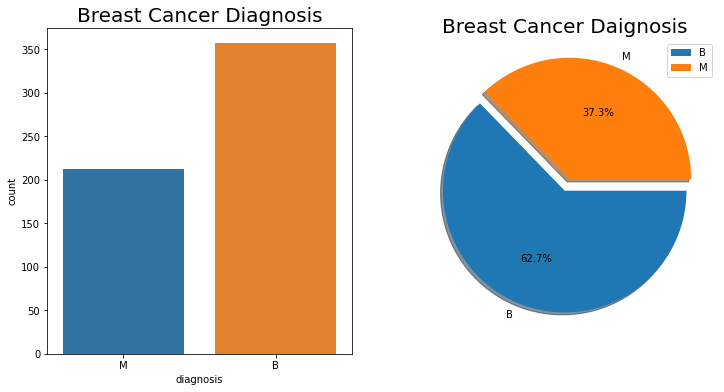

In [13]:
#Let us first analyze the distribution of the target variable
plt.figure(figsize=(12,6))

plt.subplot(1,2,1)
plt.title("Breast Cancer Diagnosis",fontsize=20)
sns.countplot(data=df,x=df.diagnosis)
plt.subplot(1,2,2)
explode=np.zeros(len(labels))
explode[-1]=0.1
print('\033[1mTarget Variable Distribution'.center(100))
plt.pie(df[target].value_counts(), labels=df[target].value_counts().index, counterclock=False, shadow=True, 
        explode=explode, autopct='%1.1f%%')
plt.title("Breast Cancer Daignosis",fontsize=20)
plt.legend(loc=1)

**Observation:**
- 37.3% Malignant(cancer patients) in the dataset.
- 62.7% Benign(non-cancer patients) in the dataset.

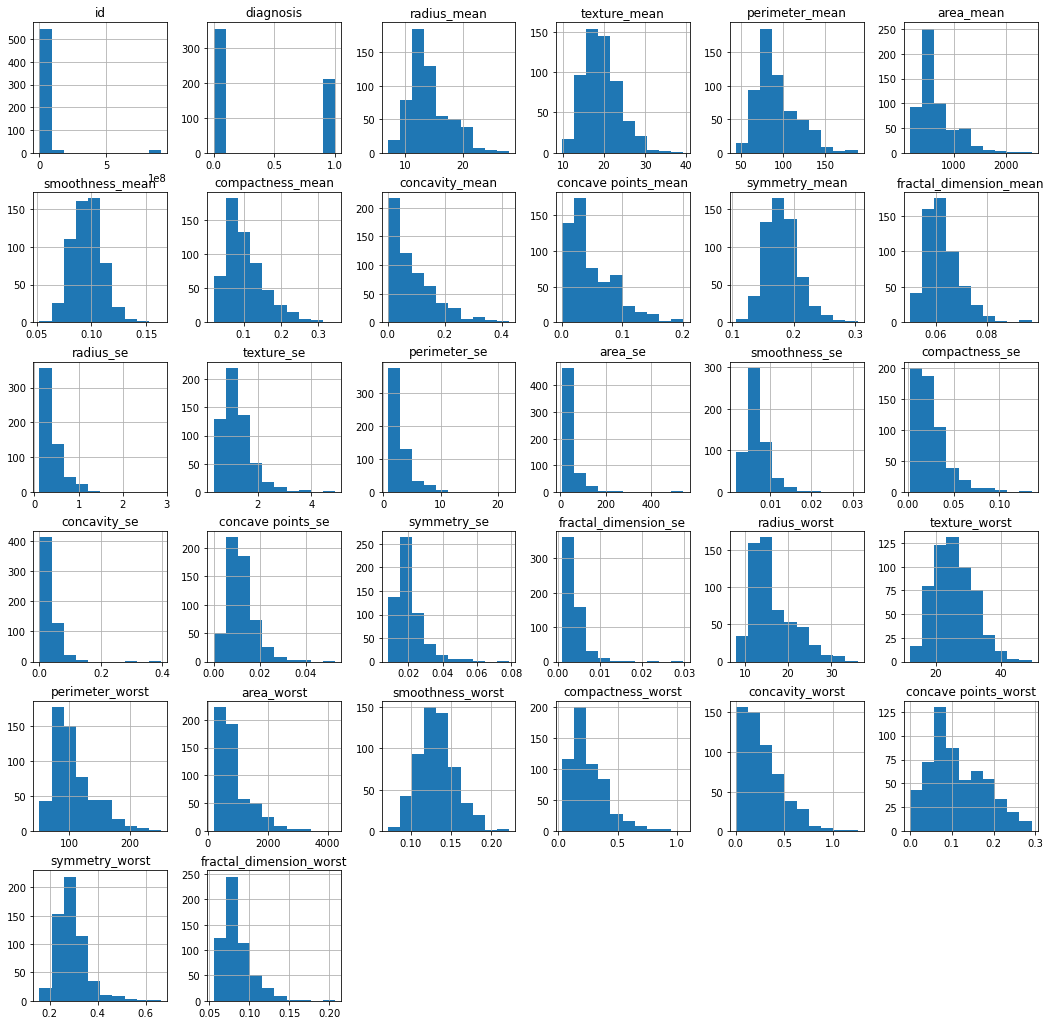

In [15]:
df.hist(figsize=(18,18))
plt.show()


**Univariate Analysis**

<AxesSubplot:xlabel='radius_mean', ylabel='Count'>

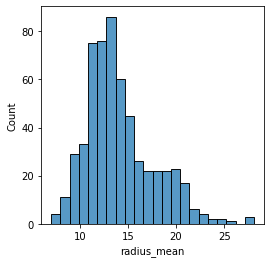

In [16]:
# Histogram Bar - Attribute radius_mean

plt.figure(figsize=(4,4))
sns.histplot(df['radius_mean'])

**Observation:**
- Maximum radius_mean is at 13.

<AxesSubplot:xlabel='texture_mean'>

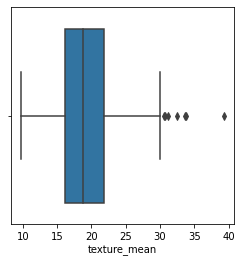

In [17]:
# Box Plot - Attribute texture_mean

plt.figure(figsize=(4,4))
sns.boxplot(df['texture_mean'])

**Observation**
- Maximum value of texture_mean is at 40.
- Minimum value of texture_mean is at 10.
- 5 outliers has been detected after 30.

**Bivariate Analysis**

<AxesSubplot:xlabel='radius_mean', ylabel='perimeter_mean'>

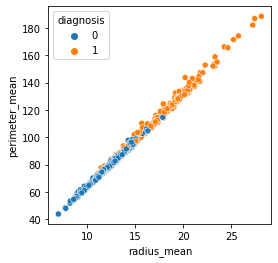

In [18]:
# Scatter Plot - Attribute radius_mean and Attribute perimeter_mean

plt.figure(figsize=(4,4))
sns.scatterplot(x=df['radius_mean'], y=df['perimeter_mean'], hue=df['diagnosis'])

**Observation:**
- There is a close positive relationship between attribute radius_mean and perimeter_mean.
  The increase that occurred in attribute radius_mean was also followed by an increase in attribute perimeter_mean. And if   attribute radius_mean, attribute perimeter_mean also decreased.

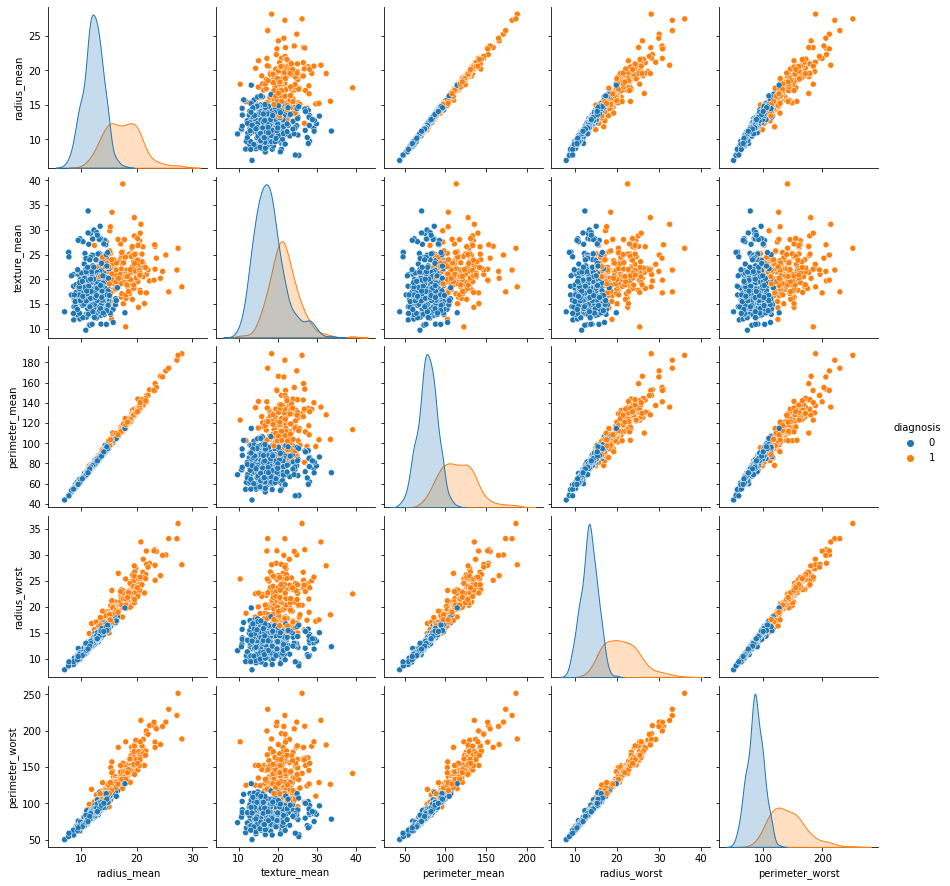

In [19]:
# pairplot

sns.pairplot(df, hue="diagnosis", vars=["radius_mean", "texture_mean", "perimeter_mean", "radius_worst", "perimeter_worst"])
plt.show()

**Multivariate Analysis**

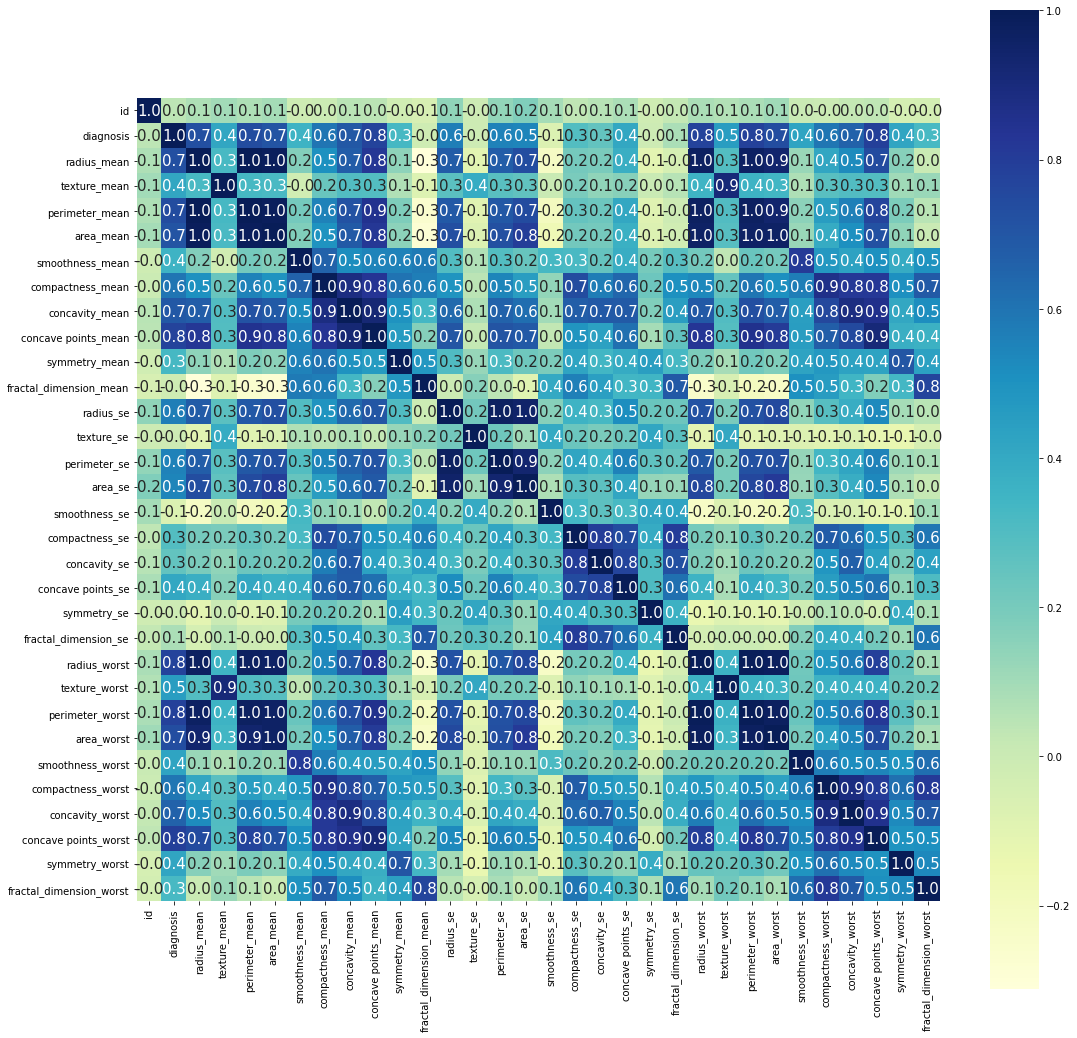

In [20]:
# Plotting heatmap based on correlation between attributes

plt.figure(figsize=(18,18))
sns.heatmap(df.corr(), cbar=True, square=True, fmt='.1f', annot=True, annot_kws={'size':15}, cmap='YlGnBu')
plt.show()

**Observation:**
- concave points_se,texture_mean,symmetry_worst,smoothness_worst,texture_worst,area_se,perimeter_se,radius_se ,compactness_worst,compactness_mean,concavity_worst,concavity_mean,area_mean,radius_mean,area_worst ,perimeter_mean,radius_worst,concave points_mean,perimeter_worst,concave points_worst are **highly co-related with target(diagnosis).**
- Others are **less co-related with diagnosis.**
 

                                     Features Distribution                                      


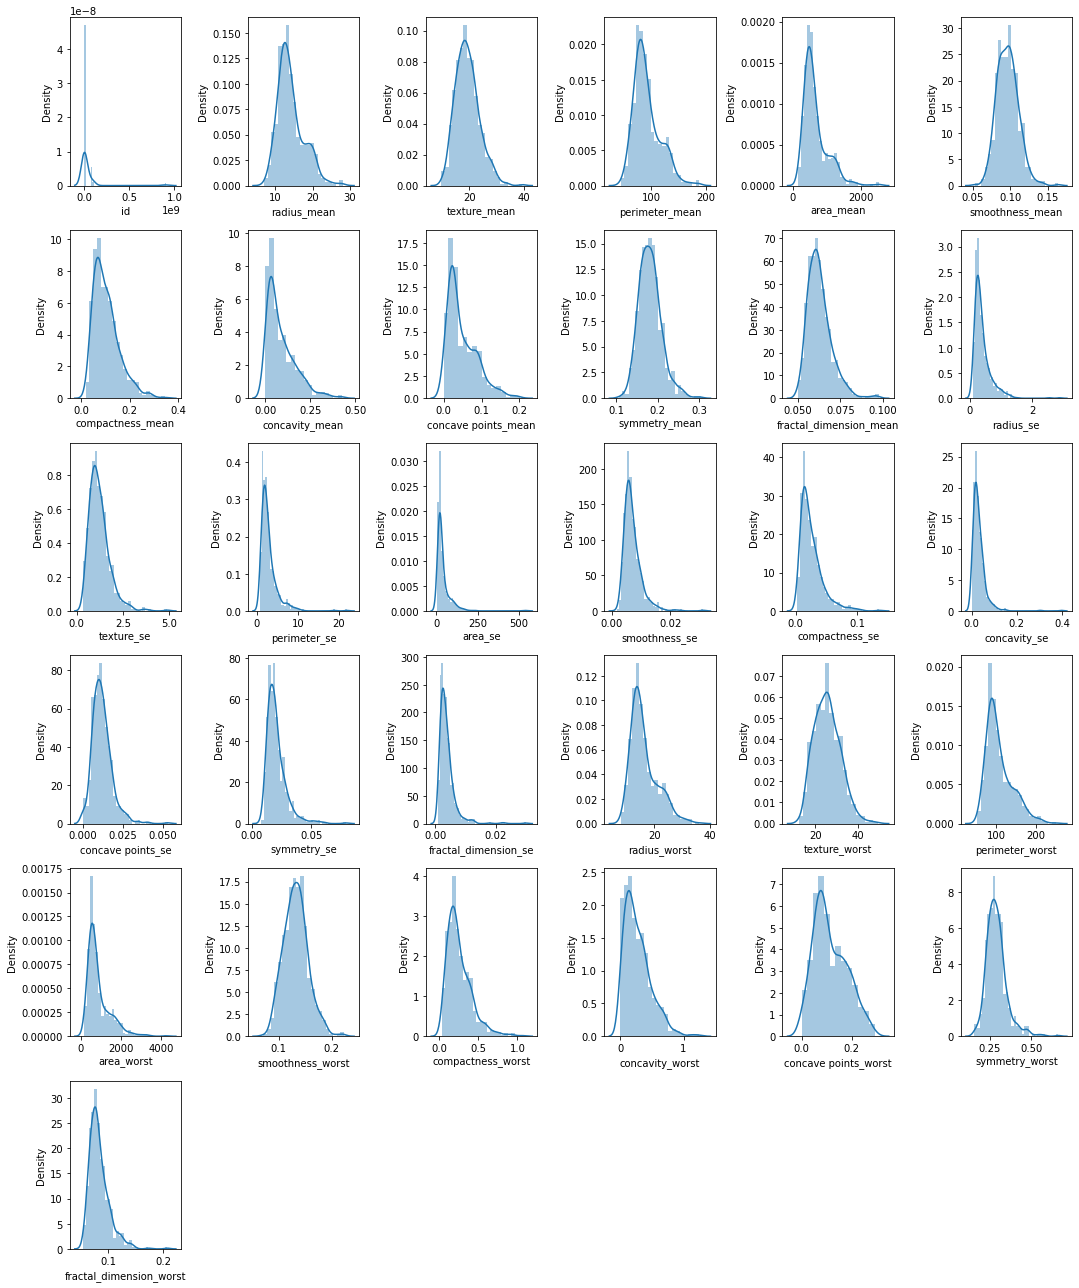

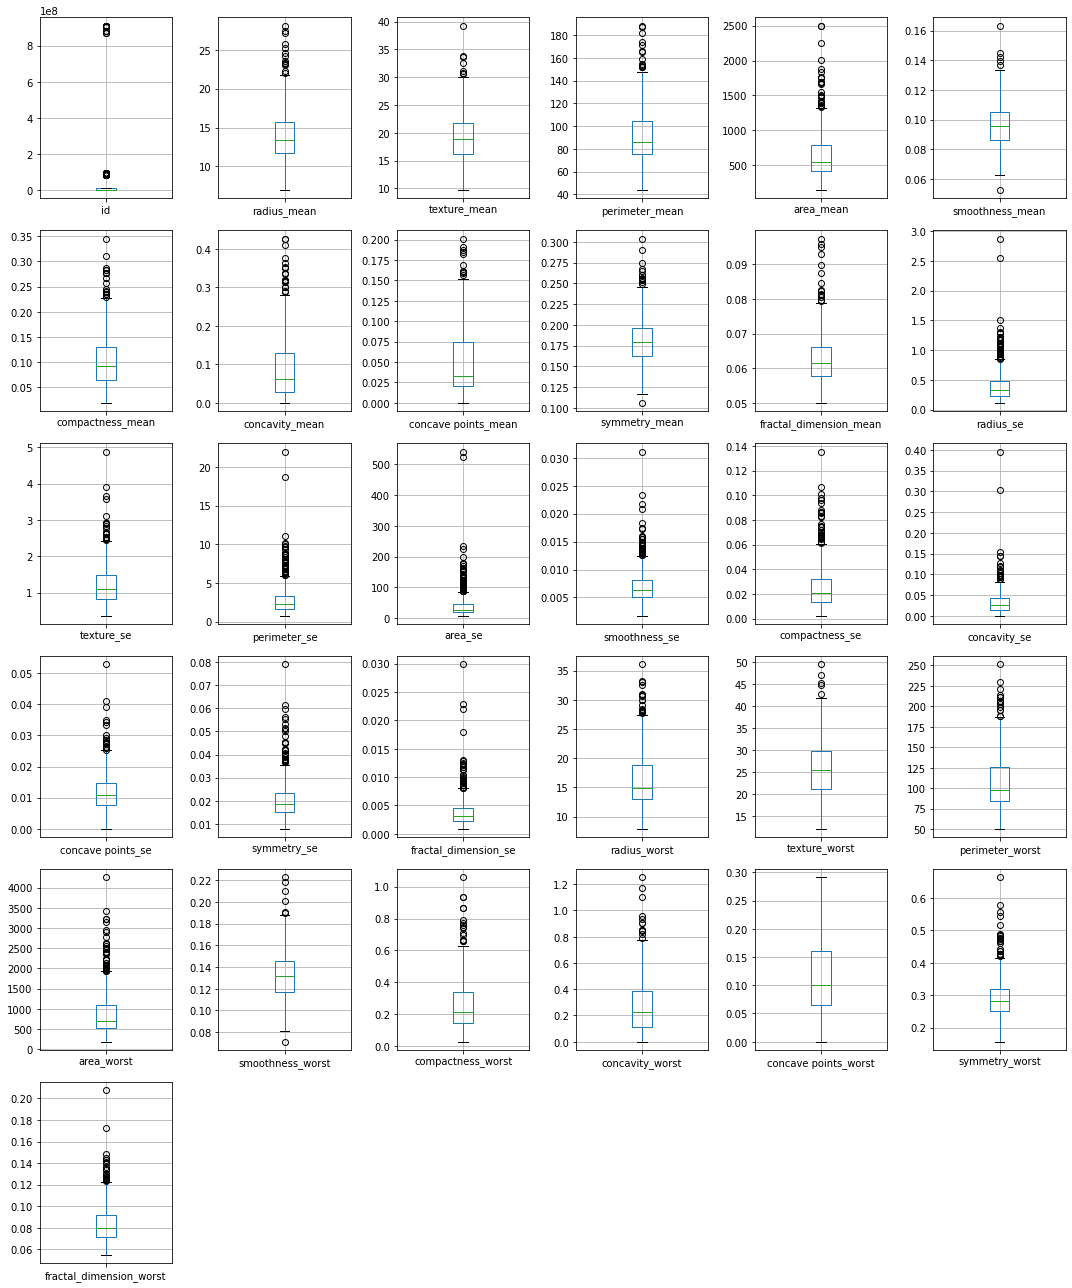

In [22]:
#understanding the feature set

print('\033[1mFeatures Distribution'.center(100))

n=6
nf = [i for i in features if i not in cf]

plt.figure(figsize=[15,3*math.ceil(len(features)/n)])
for c in range(len(nf)):
    plt.subplot(math.ceil(len(features)/n),n,c+1)
    sns.distplot(df[nf[c]])
plt.tight_layout()
plt.show()

plt.figure(figsize=[15,3*math.ceil(len(features)/n)])
for c in range(len(nf)):
    plt.subplot(math.ceil(len(features)/n),n,c+1)
    df.boxplot(nf[c])
plt.tight_layout()
plt.show()

**Observation:**
- The data is somewhat normally distributed. And there are many outliers present in the dataset. We shall fix these outliers.

In [23]:
#Understanding the relationship between all the features

# g=sns.pairplot(df, hue=target, size=4)
# g.map_upper(sns.kdeplot, levels=1, color=".2")
# plt.show()

**Observation:**
- The data samples of most of the features do show some patterns. Also they seem to have lot of overlap for the outcome classes, making it difficult to be distingusihable. Let is proceed to perform cleanup on the data to remove the irregularities.



# Check Relation of all features to Target

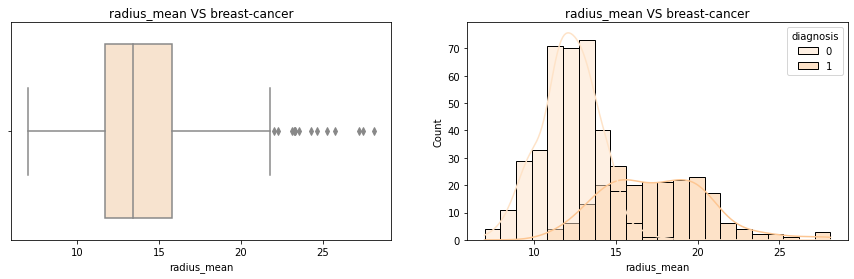

In [58]:
palette=sns.color_palette("Oranges")
sns.set_palette(palette)
#box plot and histogram plot of radius_mean column
fig = plt.figure(figsize=[15,4])

plt.subplot(1,2,1)
plt.title("radius_mean VS breast-cancer")
sns.boxplot(x='radius_mean', data=df)

plt.subplot(1,2,2)
plt.title("radius_mean VS breast-cancer")
sns.histplot(data=df, hue='diagnosis', x="radius_mean",kde=True)

plt.show()


**Observation:**
- Few Outliers has been detected after 22.
- Maximum value of radius_mean is 22.
- Minimum value of radius_mean is 2.
- Q1 is 11.3.
- Q3 is 16.0.
- Median is 13.5
- Data is slightly right skewed.

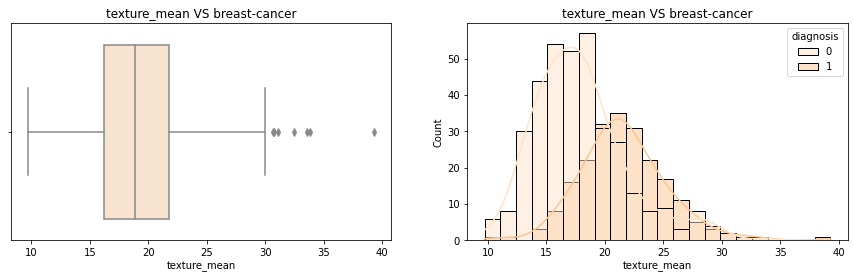

In [59]:
palette=sns.color_palette('Oranges')
sns.set_palette(palette)
#box plot and histogram plot of texture_mean column
fig = plt.figure(figsize=[15,4])

plt.subplot(1,2,1)
plt.title("texture_mean VS breast-cancer")
sns.boxplot(x='texture_mean', data=df)

plt.subplot(1,2,2)
plt.title("texture_mean VS breast-cancer")
sns.histplot(data=df, hue='diagnosis', x="texture_mean",kde=True)

plt.show()


**Observation:**
- 6 Outliers has been detected after 30.
- Maximum value of radius_mean is 30.
- Minimum value of radius_mean is 10.
- Q1 is 16.
- Q3 is 22.
- Median is 19.
- Data is slightly right skewed.

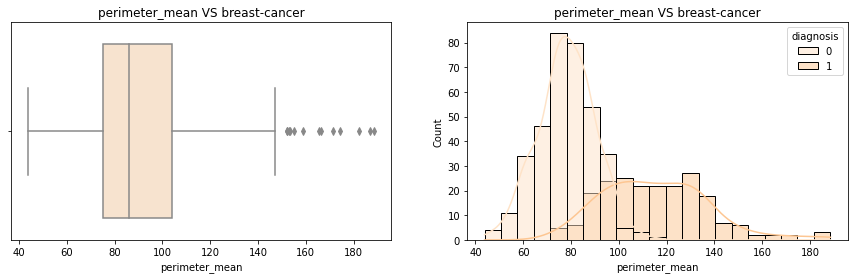

In [61]:
palette=sns.color_palette("Oranges")
sns.set_palette(palette)
#box plot and histogram plot of perimeter_mean column
fig = plt.figure(figsize=[15,4])

plt.subplot(1,2,1)
plt.title("perimeter_mean VS breast-cancer")
sns.boxplot(x='perimeter_mean', data=df)

plt.subplot(1,2,2)
plt.title("perimeter_mean VS breast-cancer")
sns.histplot(data=df, hue='diagnosis', x="perimeter_mean",kde=True)

plt.show()


**Observation:**
- Few Outliers has been detected after 148.
- Maximum value of perimeter_mean is 148.
- Minimum value of perimeter_mean is 42.
- Q1 is 78.
- Q3 is 105.
- Median is 87.
- Data is highly right skewed.

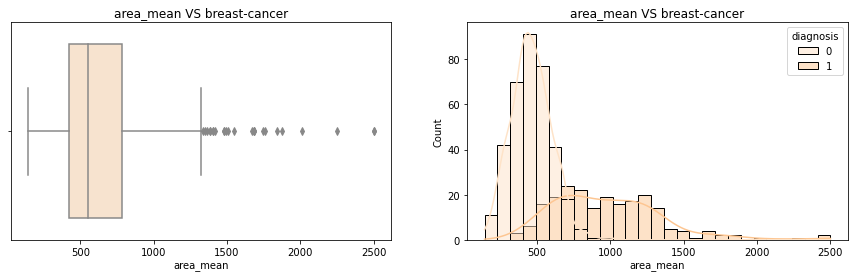

In [63]:
palette=sns.color_palette("Oranges")
sns.set_palette(palette)
#box plot and histogram plot of area_mean column
fig = plt.figure(figsize=[15,4])

plt.subplot(1,2,1)
plt.title("area_mean VS breast-cancer")
sns.boxplot(x='area_mean', data=df)

plt.subplot(1,2,2)
plt.title("area_mean VS breast-cancer")
sns.histplot(data=df, hue='diagnosis', x="area_mean",kde=True)

plt.show()

**Observation:**
- Few Outliers has been detected after 1300.
- Maximum value of area_mean is 1300.
- Minimum value of area_mean is 100.
- Q1 is 400.
- Q3 is 800.
- Median is 590.
- Data is highly right skewed.

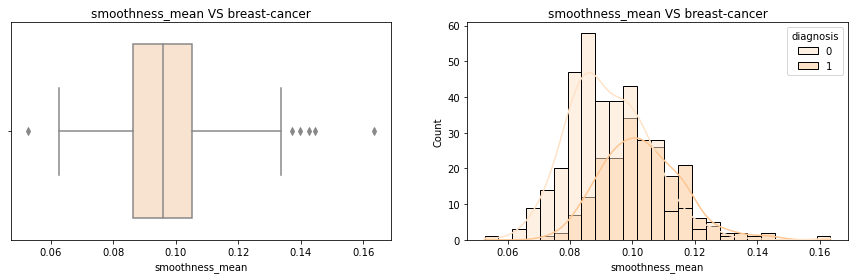

In [64]:
palette=sns.color_palette("Oranges")
sns.set_palette(palette)
#box plot and histogram plot of smoothness_mean column
fig = plt.figure(figsize=[15,4])

plt.subplot(1,2,1)
plt.title("smoothness_mean VS breast-cancer")
sns.boxplot(x='smoothness_mean', data=df)

plt.subplot(1,2,2)
plt.title("smoothness_mean VS breast-cancer")
sns.histplot(data=df, hue='diagnosis', x="smoothness_mean",kde=True)

plt.show()

**Observation:**
- 1outlier has been detected before 0.06 and 5 Outliers has been detected after 0.137.
- Maximum value of smoothness_mean is 0.137.
- Minimum value of smoothness_mean is 0.62.
- Q1 is 0.085.
- Q3 is 0.105.
- Median is 0.98.
- Data is not skewed.

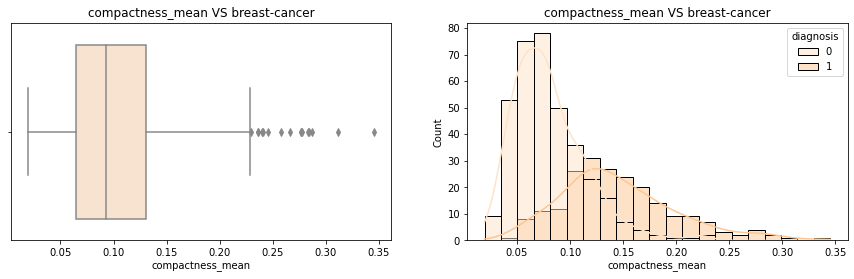

In [65]:
palette=sns.color_palette("Oranges")
sns.set_palette(palette)
#box plot and histogram plot of compactness_mean column
fig = plt.figure(figsize=[15,4])

plt.subplot(1,2,1)
plt.title("compactness_mean VS breast-cancer")
sns.boxplot(x='compactness_mean', data=df)

plt.subplot(1,2,2)
plt.title("compactness_mean VS breast-cancer")
sns.histplot(data=df, hue='diagnosis', x="compactness_mean",kde=True)

plt.show()

**Observation:**
- Few Outliers has been detected after 0.23.
- Maximum value of compactness_mean is 0.23.
- Minimum value of compactness_mean is 0.02
- Q1 is 0.065.
- Q3 is 0.135.
- Median is 0.9.
- Data is slightly right skewed.

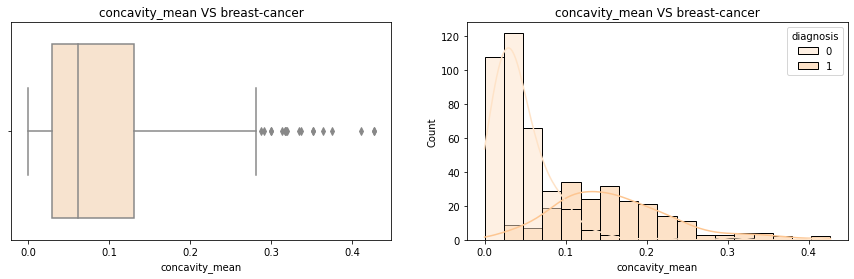

In [66]:
palette=sns.color_palette("Oranges")
sns.set_palette(palette)
#box plot and histogram plot of concavity_mean column
fig = plt.figure(figsize=[15,4])

plt.subplot(1,2,1)
plt.title("concavity_mean VS breast-cancer")
sns.boxplot(x='concavity_mean', data=df)

plt.subplot(1,2,2)
plt.title("concavity_mean VS breast-cancer")
sns.histplot(data=df, hue='diagnosis', x="concavity_mean",kde=True)

plt.show()

**Observation:**
- Few Outliers has been detected after 0.28.
- Maximum value of concavity_mean is 0.28.
- Minimum value of concavity_mean is 0.0
- Q1 is 0.03.
- Q3 is 0.14.
- Median is 0.06.
- Data is highly right skewed.

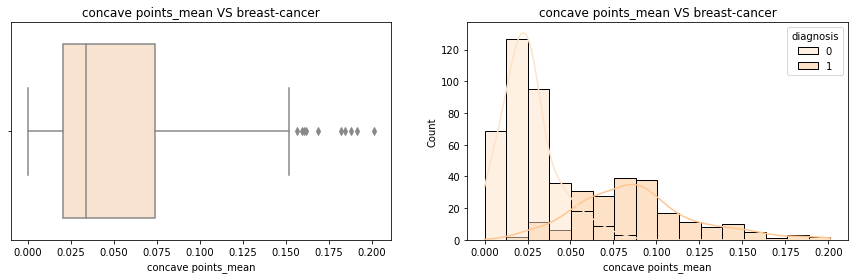

In [67]:
palette=sns.color_palette("Oranges")
sns.set_palette(palette)
#box plot and histogram plot of concave points_mean column
fig = plt.figure(figsize=[15,4])

plt.subplot(1,2,1)
plt.title("concave points_mean VS breast-cancer")
sns.boxplot(x='concave points_mean', data=df)

plt.subplot(1,2,2)
plt.title("concave points_mean VS breast-cancer")
sns.histplot(data=df, hue='diagnosis', x="concave points_mean",kde=True)

plt.show()

**Observation:**
- Few Outliers has been detected after 0.151.
- Maximum value of concave points_mean is 0.151.
- Minimum value of concave points_mean is 0.000.
- Q1 is 0.024.
- Q3 is 0.075.
- Median is 0.035.
- Data is highly right skewed.

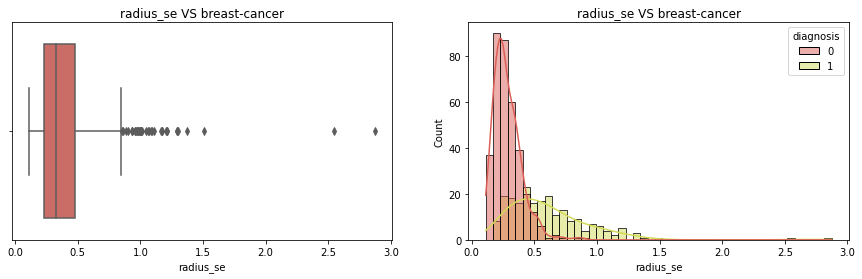

In [68]:
palette=sns.color_palette("hls")
sns.set_palette(palette)
#box plot and histogram plot of radius_se column
fig = plt.figure(figsize=[15,4])

plt.subplot(1,2,1)
plt.title("radius_se VS breast-cancer")
sns.boxplot(x='radius_se', data=df)

plt.subplot(1,2,2)
plt.title("radius_se VS breast-cancer")
sns.histplot(data=df, hue='diagnosis', x="radius_se",kde=True)

plt.show()


**Observation:**
- Few Outliers has been detected after 0.8.
- Maximum value of concave_se is 0.8.
- Minimum value of concave_se is 0.1.
- Q1 is 0.2.
- Q3 is 0.49.
- Median is 0.3.
- Data is slightly right skewed.

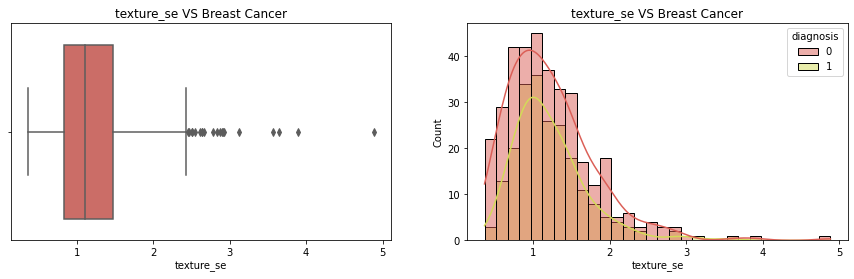

In [55]:
palette=sns.color_palette("hls")
sns.set_palette(palette)
#box plot and histogram plot of texture_se column
fig = plt.figure(figsize=[15,4])

plt.subplot(1,2,1)
plt.title("texture_se VS breast-cancer")
sns.boxplot(x='texture_se', data=df)

plt.subplot(1,2,2)
plt.title("texture_se VS breast-cancer")
sns.histplot(data=df, hue='diagnosis', x="texture_se",kde=True)

plt.show()

**Observation:**
- Few Outliers has been detected after 2.4.
- Maximum value of texture_se is 2.4.
- Minimum value of texture_se is 0.2.
- Q1 is 0.8.
- Q3 is 2.4.
- Median is 1.1.
- Data is slightly right skewed.

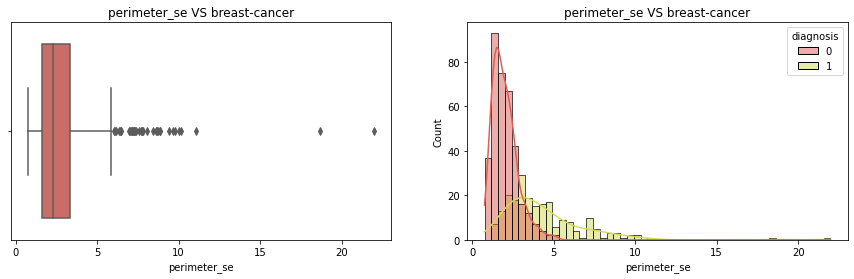

In [69]:
palette=sns.color_palette("hls")
sns.set_palette(palette)
#box plot and histogram plot of perimeter_se column
fig = plt.figure(figsize=[15,4])

plt.subplot(1,2,1)
plt.title("perimeter_se VS breast-cancer")
sns.boxplot(x='perimeter_se', data=df)

plt.subplot(1,2,2)
plt.title("perimeter_se VS breast-cancer")
sns.histplot(data=df, hue='diagnosis', x="perimeter_se",kde=True)

plt.show()

**Observation:**
- Few Outliers has been detected after 6.
- Maximum value of perimeter_se is 6.
- Minimum value of perimeter_se is 1.
- Q1 is 1.5.
- Q3 is 3.
- Median is 2.
- Data is slightly right skewed.

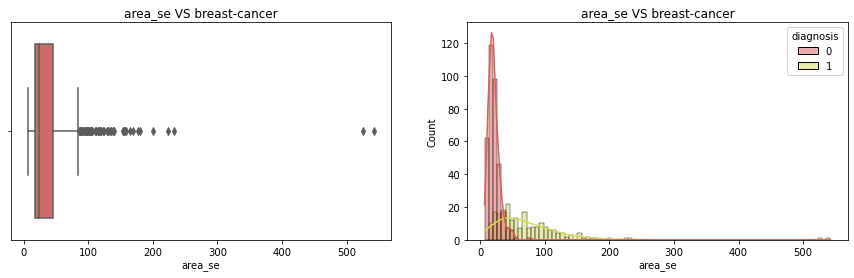

In [70]:
palette=sns.color_palette("hls")
sns.set_palette(palette)
#box plot and histogram plot of area_se column
fig = plt.figure(figsize=[15,4])

plt.subplot(1,2,1)
plt.title("area_se VS breast-cancer")
sns.boxplot(x='area_se', data=df)

plt.subplot(1,2,2)
plt.title("area_se VS breast-cancer")
sns.histplot(data=df, hue='diagnosis', x="area_se",kde=True)

plt.show()

**Observation:**
- Many Outliers has been detected after 90.
- Maximum value of area_se is 90.
- Minimum value of area_se is 10.
- Q1 is 20.
- Q3 is 40.
- Median is 20.5.
- Data is highly right skewed.

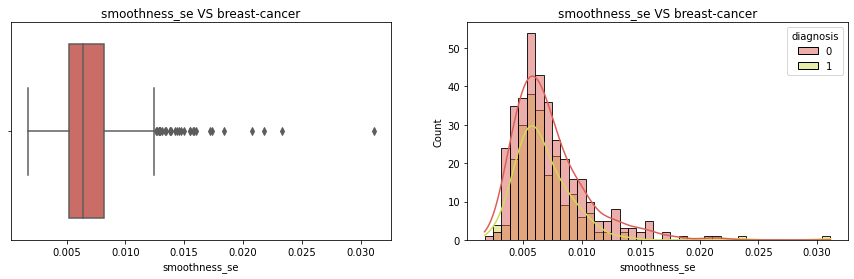

In [71]:
palette=sns.color_palette("hls")
sns.set_palette(palette)
#box plot and histogram plot of smoothness_se column
fig = plt.figure(figsize=[15,4])

plt.subplot(1,2,1)
plt.title("smoothness_se VS breast-cancer")
sns.boxplot(x='smoothness_se', data=df)

plt.subplot(1,2,2)
plt.title("smoothness_se VS breast-cancer")
sns.histplot(data=df, hue='diagnosis', x="smoothness_se",kde=True)

plt.show()

**Observation:**
- Many Outliers has been detected after 0.013.
- Maximum value of smoothness_se is 0.013.
- Minimum value of smoothness_se is 0.002.
- Q1 is 0.005.
- Q3 is 0.085.
- Median is 0.065.
- Data is highly right skewed.

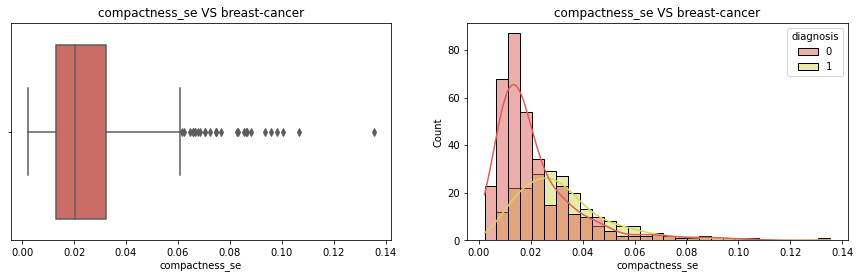

In [72]:
palette=sns.color_palette("hls")
sns.set_palette(palette)
#box plot and histogram plot of compactness_se column
fig = plt.figure(figsize=[15,4])

plt.subplot(1,2,1)
plt.title("compactness_se VS breast-cancer")
sns.boxplot(x='compactness_se', data=df)

plt.subplot(1,2,2)
plt.title("compactness_se VS breast-cancer")
sns.histplot(data=df, hue='diagnosis', x="compactness_se",kde=True)

plt.show()

**Observation:**
- Many Outliers has been detected after 0.06.
- Maximum value of compactness_se is 0.06.
- Minimum value of compactness_se is 0.002.
- Q1 is 0.015.
- Q3 is 0.035.
- Median is 0.02.
- Data is highly right skewed.

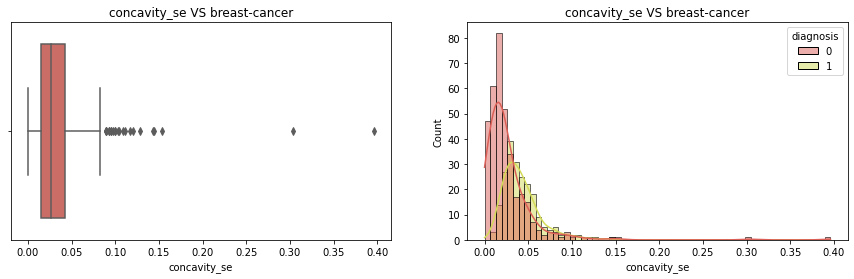

In [73]:
palette=sns.color_palette("hls")
sns.set_palette(palette)
#box plot and histogram plot of concavity_se column
fig = plt.figure(figsize=[15,4])

plt.subplot(1,2,1)
plt.title("concavity_se VS breast-cancer")
sns.boxplot(x='concavity_se', data=df)

plt.subplot(1,2,2)
plt.title("concavity_se VS breast-cancer")
sns.histplot(data=df, hue='diagnosis', x="concavity_se",kde=True)

plt.show()

**Observation:**
- Many Outliers has been detected after 0.08.
- Maximum value of concavity_se is 0.08.
- Minimum value of concavity_se is 0.00.
- Q1 is 0.02.
- Q3 is 0.045.
- Median is 0.03.
- Data is slightly right skewed.

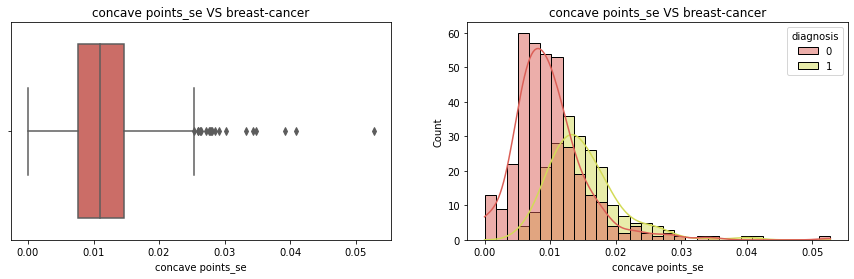

In [74]:
palette=sns.color_palette("hls")
sns.set_palette(palette)
#box plot and histogram plot of concave points_se column
fig = plt.figure(figsize=[15,4])

plt.subplot(1,2,1)
plt.title("concave points_se VS breast-cancer")
sns.boxplot(x='concave points_se', data=df)

plt.subplot(1,2,2)
plt.title("concave points_se VS breast-cancer")
sns.histplot(data=df, hue='diagnosis', x="concave points_se",kde=True)

plt.show()

**Observation:**
- Many Outliers has been detected after 0.025.
- Maximum value of concave points_se is 0.025.
- Minimum value of concave points_se is 0.00.
- Q1 is 0.008.
- Q3 is 0.015.
- Median is 0.012.
- Data is not skewed.

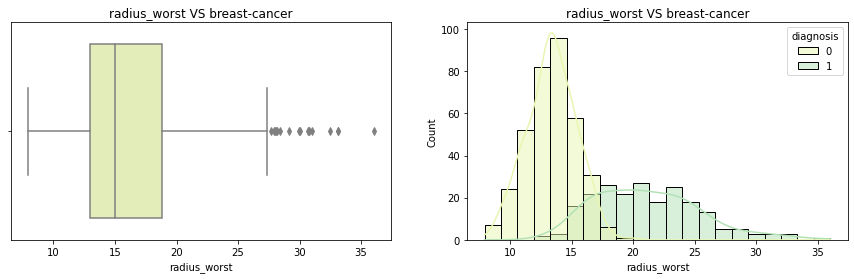

In [79]:
palette=sns.color_palette("YlGnBu")
sns.set_palette(palette)
#box plot and histogram plot of radius_worst column
fig = plt.figure(figsize=[15,4])

plt.subplot(1,2,1)
plt.title("radius_worst VS breast-cancer")
sns.boxplot(x='radius_worst', data=df)

plt.subplot(1,2,2)
plt.title("radius_worst VS breast-cancer")
sns.histplot(data=df, hue='diagnosis', x="radius_worst",kde=True)

plt.show()

**Observation:**
- Many Outliers has been detected after 27.5.
- Maximum value of radius_worst is 27.5.
- Minimum value of radius_worst is 4.
- Q1 is 13.5.
- Q3 is 19.
- Median is 15.
- Data is highly right skewed.

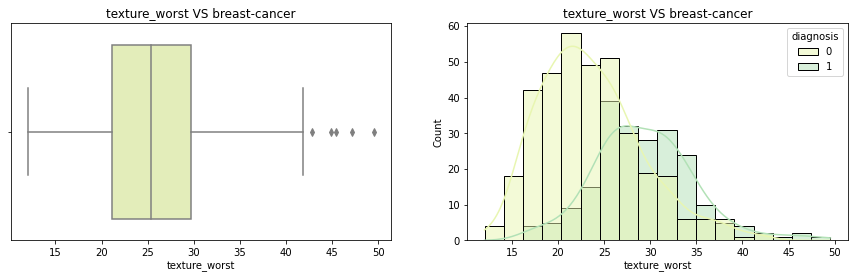

In [80]:
palette=sns.color_palette("YlGnBu")
sns.set_palette(palette)
#box plot and histogram plot of texture_worst column
fig = plt.figure(figsize=[15,4])

plt.subplot(1,2,1)
plt.title("texture_worst VS breast-cancer")
sns.boxplot(x='texture_worst', data=df)

plt.subplot(1,2,2)
plt.title("texture_worst VS breast-cancer")
sns.histplot(data=df, hue='diagnosis', x="texture_worst",kde=True)

plt.show()

**Observation:**
- Many Outliers has been detected after 42.
- Maximum value of texture_worst is 42.
- Minimum value of texture_worst is 12.
- Q1 is 21.
- Q3 is 29.9.
- Median is 25.5.
- Data is not skewed.

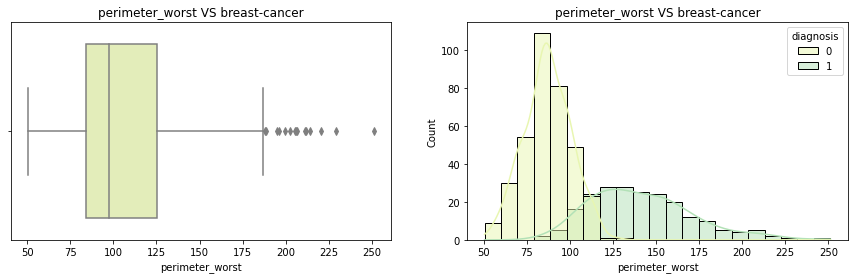

In [95]:
palette=sns.color_palette("YlGnBu")
sns.set_palette(palette)
#box plot and histogram plot of perimeter_worst column
fig = plt.figure(figsize=[15,4])

plt.subplot(1,2,1)
plt.title("perimeter_worst VS breast-cancer")
sns.boxplot(x='perimeter_worst', data=df)

plt.subplot(1,2,2)
plt.title("perimeter_worst VS breast-cancer")
sns.histplot(data=df, hue='diagnosis', x="perimeter_worst",kde=True)

plt.show()

**Observation:**
- Many Outliers has been detected after 185.
- Maximum value of perimeter_worst is 185.
- Minimum value of perimeter_worst is 50.
- Q1 is 80.
- Q3 is 125.
- Median is 98.
- Data is highly right skewed.

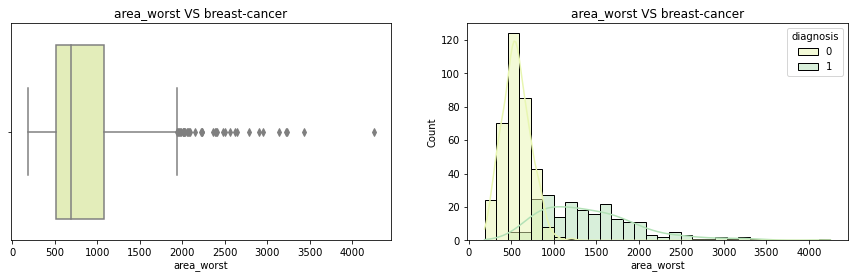

In [82]:
palette=sns.color_palette("YlGnBu")
sns.set_palette(palette)
#box plot and histogram plot of area_worst column
fig = plt.figure(figsize=[15,4])

plt.subplot(1,2,1)
plt.title("area_worst VS breast-cancer")
sns.boxplot(x='area_worst', data=df)

plt.subplot(1,2,2)
plt.title("area_worst VS breast-cancer")
sns.histplot(data=df, hue='diagnosis', x="area_worst",kde=True)

plt.show()

**Observation:**
- Many Outliers has been detected after 1999.
- Maximum value of area_worst is 1999.
- Minimum value of area_worst is 200.
- Q1 is 500.
- Q3 is 1100.
- Median is 650.
- Data is highly right skewed

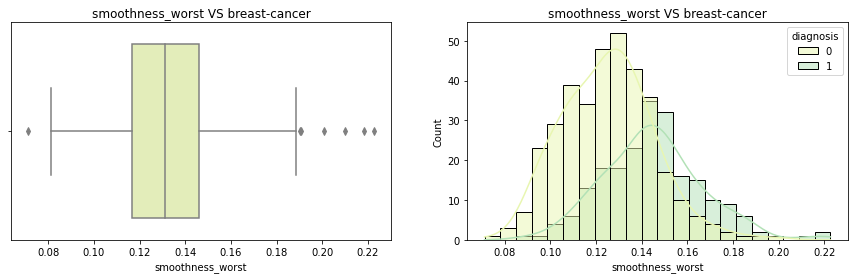

In [83]:
palette=sns.color_palette("YlGnBu")
sns.set_palette(palette)
#box plot and histogram plot of smoothness_worst column
fig = plt.figure(figsize=[15,4])

plt.subplot(1,2,1)
plt.title("smoothness_worst VS breast-cancer")
sns.boxplot(x='smoothness_worst', data=df)

plt.subplot(1,2,2)
plt.title("smoothness_worst VS breast-cancer")
sns.histplot(data=df, hue='diagnosis', x="smoothness_worst",kde=True)

plt.show()

**Observation:**
- 1outlier has been detected before 0.08 and 5 Outliers has been detected after 0.19.
- Maximum value of smoothness_worst is 0.19.
- Minimum value of smoothness_worst is 0.081.
- Q1 is 0.118.
- Q3 is 0.144.
- Median is 0.13.
- Data is not skewed

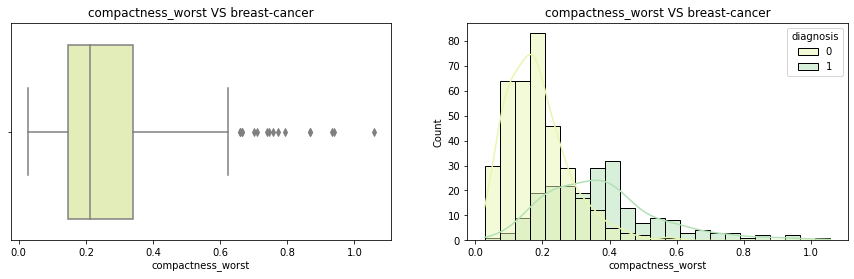

In [84]:
palette=sns.color_palette("YlGnBu")
sns.set_palette(palette)
#box plot and histogram plot of compactness_worst column
fig = plt.figure(figsize=[15,4])

plt.subplot(1,2,1)
plt.title("compactness_worst VS breast-cancer")
sns.boxplot(x='compactness_worst', data=df)

plt.subplot(1,2,2)
plt.title("compactness_worst VS breast-cancer")
sns.histplot(data=df, hue='diagnosis', x="compactness_worst",kde=True)

plt.show()

**Observation:**
- Few Outliers has been detected after 0.64.
- Maximum value of compactness_worst is 0.64.
- Minimum value of compactness_worst is 0.002.
- Q1 is 0.17.
- Q3 is 0.36.
- Median is 0.21.
- Data is highly right skewed.

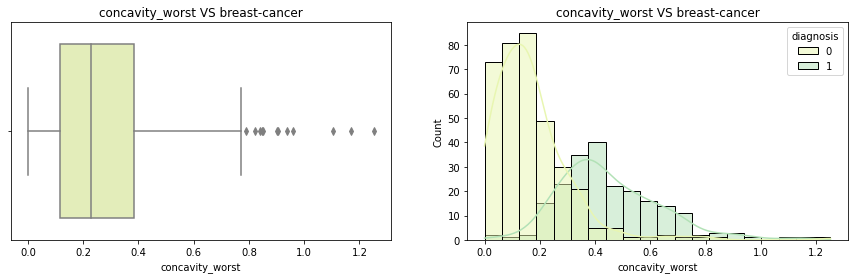

In [85]:
palette=sns.color_palette("YlGnBu")
sns.set_palette(palette)
#box plot and histogram plot of concavity_worst column
fig = plt.figure(figsize=[15,4])

plt.subplot(1,2,1)
plt.title("concavity_worst VS breast-cancer")
sns.boxplot(x='concavity_worst', data=df)

plt.subplot(1,2,2)
plt.title("concavity_worst VS breast-cancer")
sns.histplot(data=df, hue='diagnosis', x="concavity_worst",kde=True)

plt.show()

**Observation:**
- Few Outliers has been detected after 0.78.
- Maximum value of concavity_worst is 0.78.
- Minimum value of concavity_worst is 0.00.
- Q1 is 0.1.
- Q3 is 0.39.
- Median is 0.22.
- Data is slightly right skewed.

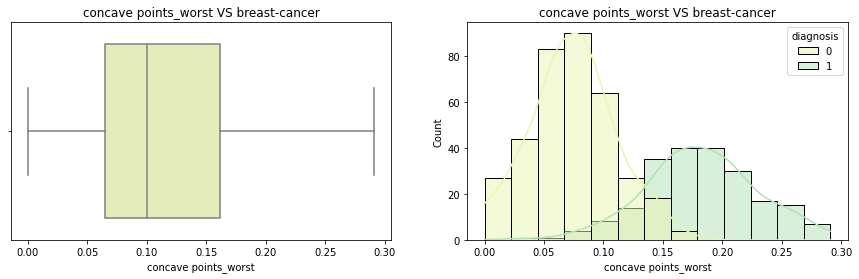

In [86]:
palette=sns.color_palette("YlGnBu")
sns.set_palette(palette)
#box plot and histogram plot of concave points_worst column
fig = plt.figure(figsize=[15,4])

plt.subplot(1,2,1)
plt.title("concave points_worst VS breast-cancer")
sns.boxplot(x='concave points_worst', data=df)

plt.subplot(1,2,2)
plt.title("concave points_worst VS breast-cancer")
sns.histplot(data=df, hue='diagnosis', x="concave points_worst",kde=True)

plt.show()

**Observation:**
- No Outlier has been detected.
- Maximum value of concave points_worst is 0.29.
- Minimum value of concave points_worst is 0.00.
- Q1 is 0.06.
- Q3 is 0.16.
- Median is 0.10.
- Data is highly right skewed.

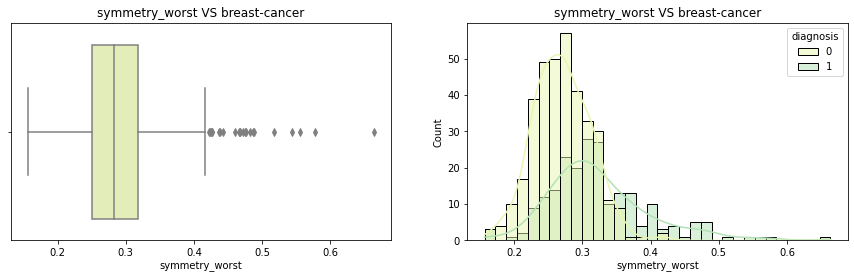

In [87]:
palette=sns.color_palette("YlGnBu")
sns.set_palette(palette)
#box plot and histogram plot of symmetry_worst column
fig = plt.figure(figsize=[15,4])

plt.subplot(1,2,1)
plt.title("symmetry_worst VS breast-cancer")
sns.boxplot(x='symmetry_worst', data=df)

plt.subplot(1,2,2)
plt.title("symmetry_worst VS breast-cancer")
sns.histplot(data=df, hue='diagnosis', x="symmetry_worst",kde=True)

plt.show()

**Observation:**
- Many Outliers has been detected after 0.43.
- Maximum value of symmetry_worst is 0.43.
- Minimum value of symmetry_worst is 0.08.
- Q1 is 0.25
- Q3 is 0.32.
- Median is 0.28.
- Data is not skewed.

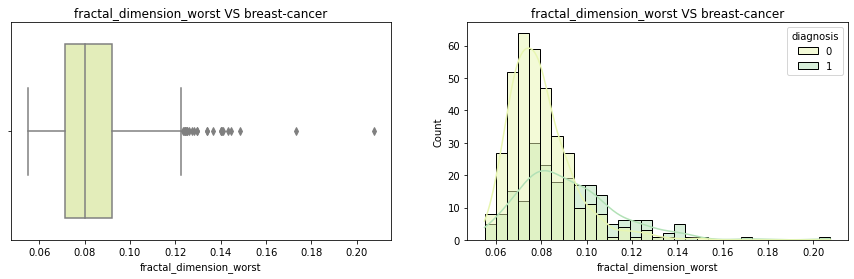

In [88]:
palette=sns.color_palette("YlGnBu")
sns.set_palette(palette)
#box plot and histogram plot of fractal_dimension_worst column
fig = plt.figure(figsize=[15,4])

plt.subplot(1,2,1)
plt.title("fractal_dimension_worst VS breast-cancer")
sns.boxplot(x='fractal_dimension_worst', data=df)

plt.subplot(1,2,2)
plt.title("fractal_dimension_worst VS breast-cancer")
sns.histplot(data=df, hue='diagnosis', x="fractal_dimension_worst",kde=True)

plt.show()

**Observation:**
- Many Outliers has been detected after 0.12.
- Maximum value of fractal_dimension_worst is 0.12.
- Minimum value of fractal_dimension_worst is 0.05.
- Q1 is 0.07
- Q3 is 0.095.
- Median is 0.08.
- Data is slightly right skewed.

# **Conclusion**

- There are **569 Rows and 32 Columns** in datasets.
- All the **features** have **Numericals values**.
- **37.3% Malignant(cancer patients)** in the dataset.
- **62.7% Benign(non-cancer patients)** in the dataset.
- concave points_se,texture_mean,symmetry_worst,smoothness_worst,texture_worst,area_se,perimeter_se,radius_se     ,compactness_worst,compactness_mean,concavity_worst,concavity_mean,area_mean,radius_mean,area_worst                ,perimeter_mean,radius_worst,concave points_mean,perimeter_worst,concave points_worst are **highly co-related with target(diagnosis).**
- Others are **less co-related with target(diagnosis).**
- There are many **outliers** in datasets.
- The data is clean has **no NAN value.**
- The data is **highly right skewed.**